# Support Vector Machine (SVM)

## 선형(Linear) SVM 

- 딥러닝 이전에 분류에서 뛰어난 성능으로 많이 사용되었던 분류 모델
- 하나의 분류 그룹을 다른 그룹과 분리하는 최적의 경계를 찾아내는 알고리즘
- 중간 크기의 데이터셋과 특성이(Feature) 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다.

**선 (1)과 (2)중 어떤 선이 최적의 분류 선일까?**
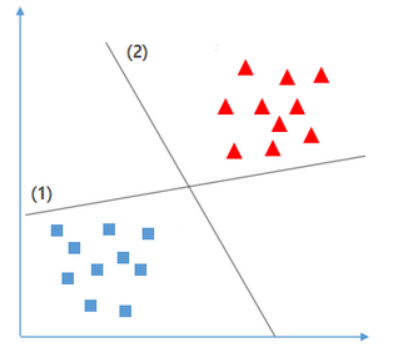

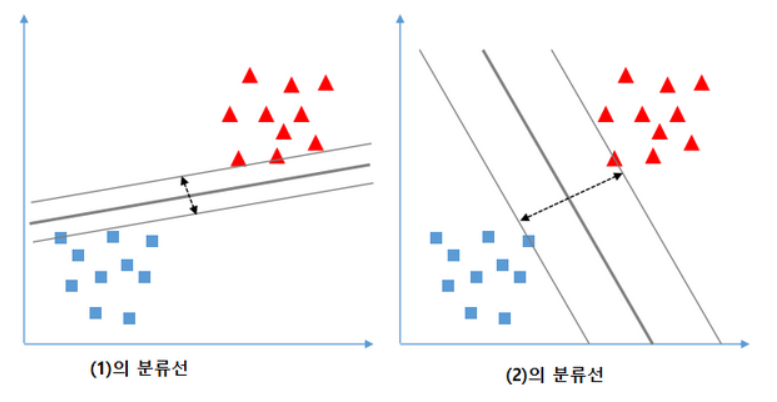

## 목표: support vector간의 가장 넓은 margin을 가지는 초평면(결정경계)를 찾는다.
> ### 초평면
> - 데이터가 존재하는 공간보다 1차원 낮은 부분공간
>    - n차원의 초평면은 n-1차원
>    - 공간을 나누기 위해 초평면을 사용한다.
>    - 1차원-점, 2차원-선, 3차원-평면, 4차원이상 초평면

- **Support Vector**: 경계를 찾아내는데 기준이 되는 데이터포인트. 초평면(결정경계)에 가장 가까이 있는 vector(데이터포인트)를 말한다.
- **margin**: 두 support vector간의 너비
- margin이 넓은 결정경계를 만드는 함수를 찾는 것.


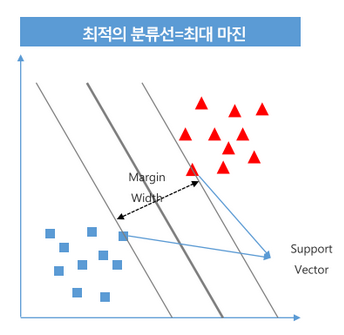

## 규제 - Hard Margin, Soft Margin

- SVM은 데이터 포인트들을 잘 분리하면서 Margin 의 크기를 최대화하는 것이 목적이다. 
    - Margin의 최대화에 가장 문제가 되는 것이 Outlier(이상치) 들이다. 
    - Train set의 Outlier들은 Overfitting에 주 원인이 된다.
- Margine을 나눌 때 Outlier을 얼마나 무시할 것인지에 따라 Hard margin과 soft margin으로 나뉜다.
- **Hard Margin**
    - Outlier들을 무시하지 않고 Support Vector를 찾는다. 그래서 Support Vector와 결정 경계 사이의 거리 즉 Margin이 매우 좁아 질 수 있다. 학습시 이렇게 개별 데이터포인트들을 다 놓치지 않으려는 기준으로 결정 경계를 정해버리면 overfitting 문제가 발생할 수 있다.
- **Soft Margin**    
    - 일부 Outlier들을 무시하고 Support Vector를 찾는다. 즉 Outlier들이 Margin 안에 어느정도 포함되도록 기준을 잡는다. 그래서 Support Vector와 결정 경계 사이 즉 Margin의 거리가 넓어진다. 얼마나 많은 Outlier들을 무시할 지는 하이퍼파라미터로 설정한다. 무시비율이 너무 커지면 underfitting 문제가 발생할 수 있다.

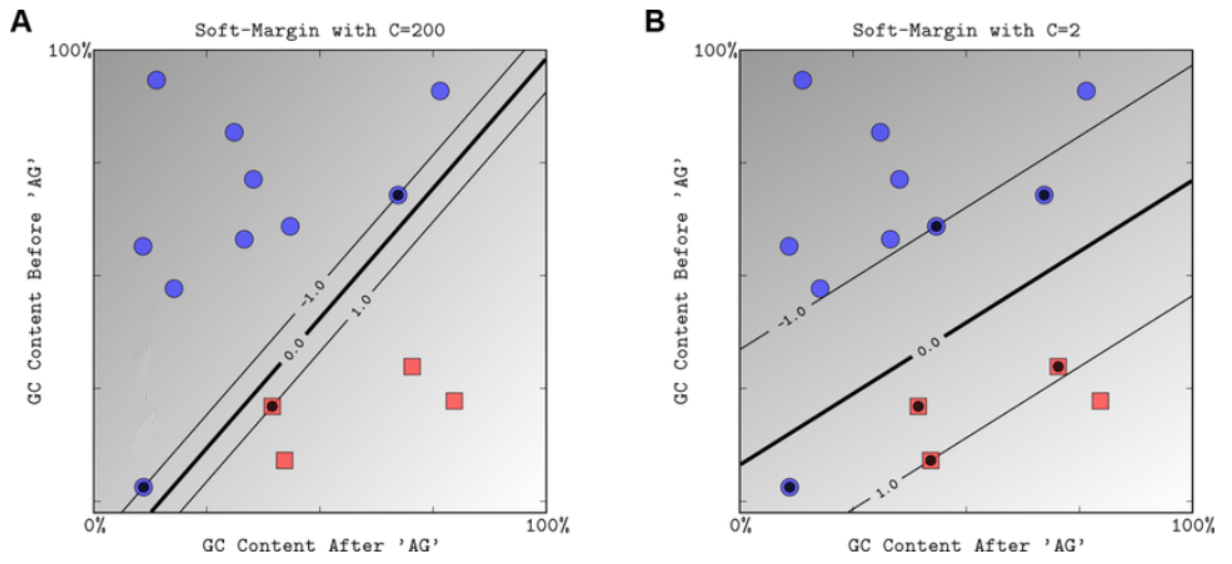

### 하이퍼파라미터 C
- Outlier 를 무시하는 비율을 설정하는 하이퍼파라미터
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **하이퍼파라미터인 C값을** 조정해 마진을 변경한다.
- 기본값 1
- 파라미터값을 크게주면 제약조건을 강하게 한다.
    - 마진폭이 좁아져 마진 오류가 작아지나 Overfitting이 일어날 가능성이 크다.
- 파라미터값을 작게 주면 제약조건을 약하게 한다.
    - 마진폭이 넓어져 마진 오류가 커진다. 
    - 훈련데이터에서는 성능이 안좋아지나 일반화(generalization)되어 테스트 데이터의 성능이 올라간다. 그러나 underfitting 이 날 가능성이 있다.

### Linear SVM에서 C의 변화에 따른 성능변화 확인

##### import

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### 데이터 로딩, train/test set 나누기

In [2]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

##### Feature scaling

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델생성 및 학습
- 규제 파라미터인 **C** 값을 변경하면서 성능 확인

In [4]:
c_params = [0.0001, 0.001, 0.01, 0.1, 1, 10,100]
# 파라미터 C 별 성능지표를 저장할 List
train_acc_list = []
test_acc_list = []

for c in c_params:
#     모델생성
    svc = SVC(kernel='linear', C=c, random_state=0)
#     학습 - Scaling한 X값
    svc.fit(X_train_scaled, y_train)
#     추론 - Scaling한 X값
    pred_train = svc.predict(X_train_scaled)
    pred_test = svc.predict(X_test_scaled)
#     정확도 평가
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

##### 결과 확인

In [5]:
result_df = pd.DataFrame({
    'C':c_params,
    'Train':train_acc_list,
    'Test':test_acc_list
})
result_df

C     Train      Test
0    0.0001  0.645540  0.636364
1    0.0010  0.941315  0.930070
2    0.0100  0.974178  0.972028
3    0.1000  0.988263  0.972028
4    1.0000  0.990610  0.965035
5   10.0000  0.995305  0.958042
6  100.0000  0.995305  0.958042

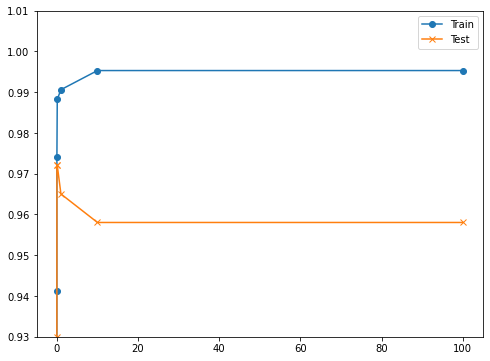

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(c_params, train_acc_list, marker='o', label="Train")
plt.plot(c_params, test_acc_list, marker='x', label='Test')
# plt.xlim (0,0.05)
plt.ylim(0.93, 1.01)
plt.legend()
plt.show()

## 커널 서포트 벡터 머신
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우는?
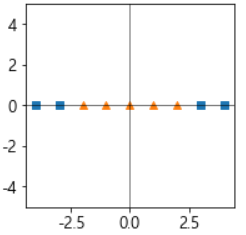

- 다항식 특성을 추가하여 차원을 늘려 선형 분리가 되도록 변환   
<center>[2차원으로 변환 $x_3=x_1^2$ 항 추가]</center>

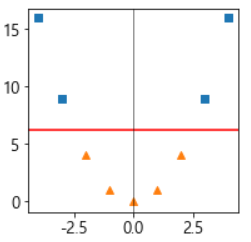

<center>[원래 공간으로 변환]</center>

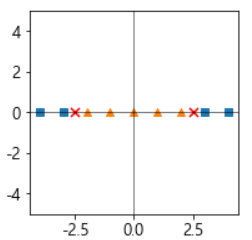

https://www.youtube.com/watch?v=3liCbRZPrZA&t=42s

### 차원을 늘리는 경우의 문제
- 다항식 특성을 추가하는 방법은 낮은 차수의 다항식은 데이터의 패턴을 잘 표현하지 못해 과소적합이 너무 높은 차수의 다항식은 과대적합과 모델을 느리게 하는 문제가 있다.

### 커널 트릭(Kernel trick)
- 다항식을 만들기 위한 특성을 추가하지 않으면서 수학적 기교를 적용해 다항식 특성을 추가한 것과 같은 결과를 얻을 수있다.
- 이런 방식을 커널 트릭이라고 한다.
- 커널 트릭을 위한 다양한 함수가 있는데 이중 **방사 기저 함수**가 제일 많이 사용된다.

#### 방사기저(radial base function-RBF) 함수
- 커널 서포트 벡터 머신의 기본 커널 함수
- 기준점들이 되는 위치를 지정하고 각 샘플이 그 기준점들과 얼마나 떨어졌는 지를 계산한다. => 유사도(거리)
- 기준점 별 유사도 계산한 값은 원래 값보다 차원이 커지고 선형적으로 구분될 가능성이 커진다.

    
$$
\Phi(x, l) = exp\left(-\gamma \left\|x-l\right\|^2\right)
$$

$$
e^{-\gamma \left\|x-l\right\|^2}
$$

<center>방사기저함수($\Phi$) x: 샘플, l: 기준값, $\gamma$(gamma): 규제 파라미터, e: 자연상수- 2.71828<center>

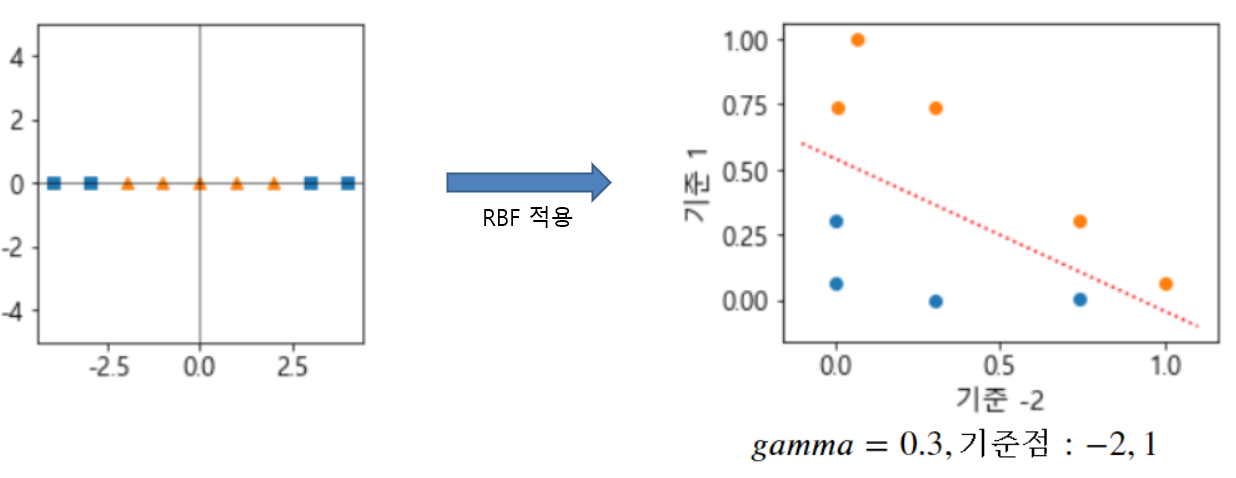

- ### rbf(radial basis function) 하이퍼파라미터
    - C
        - 오차 허용기준. 작은 값일 수록 많이 허용한다.
            - 큰 값일 수록 과적합이 날 가능성이 높아진다.
        - 과적합일 경우 값을 감소시키고, 과소적합일 경우 값을 증가 시킨다.
    - gamma 
        - 방사기저함수의 $\gamma$로 규제의 역할을 한다.
            - 큰 값일 수록 과적합이 날 가능성이 높아진다.
        - 모델이 과대적합일 경우 값을 감소시키고, 과소적합일 경우 값을 증가시킨다.
        

##### Gamma 변경에 따른 성능 변화 확인

In [9]:
gamma_param = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_acc_list = []
test_acc_list = []
for gamma in gamma_param:
    svc = SVC(kernel='rbf', # default가 rbf->생략가능
              C=1,
              gamma=gamma, 
              random_state=0)
    svc.fit(X_train_scaled, y_train)
    
    pred_train = svc.predict(X_train_scaled)
    pred_test = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

##### 결과 확인

In [10]:
result_df = pd.DataFrame({
    'gamma':gamma_param,
    'train':train_acc_list,
    'test':test_acc_list
})
result_df

gamma     train      test
0    0.0001  0.774648  0.790210
1    0.0010  0.950704  0.958042
2    0.0100  0.976526  0.965035
3    0.1000  0.995305  0.937063
4    1.0000  1.000000  0.629371
5   10.0000  1.000000  0.629371
6  100.0000  1.000000  0.629371

##### ROC AUC score, AP score 

In [19]:
# svc 에서 predict_proba() 메소드를 사용하기 위해서는 
# 객체 생성시 probability=True로 설정해야 한다.
svc = SVC(C=1, gamma=0.01, random_state=0, probability=True)
svc.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01, probability=True, random_state=0)

In [20]:
prob_test = svc.predict_proba(X_test_scaled) #predict_proba(): 확률예측 

In [21]:
prob_test[:5]

array([[9.99965776e-01, 3.42235943e-05],
       [9.96997365e-01, 3.00263452e-03],
       [8.08209548e-03, 9.91917905e-01],
       [9.99497692e-01, 5.02307570e-04],
       [9.93382616e-01, 6.61738365e-03]])

In [16]:
from sklearn.metrics import roc_auc_score, average_precision_score
print(roc_auc_score(y_test, prob_test[:, 1])) #(정답, 양성의확률)
average_precision_score(y_test, prob_test[:, 1])

0.9951781970649896


0.9970891340182375

## GridSearch로 최적의 조합찾기

##### GridSearchCV 생성 및 학습

In [23]:
param = {
    'kernel':['rbf', 'linear'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1, 10]
}
svc = SVC(random_state=1, probability=True)
gs_svc = GridSearchCV(svc, 
                      param_grid=param, 
                      scoring='accuracy',
                      cv=3,
                      n_jobs=-1)

In [24]:
gs_svc.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

#####  결과확인

In [25]:
gs_svc.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [26]:
gs_svc.best_score_

0.983568075117371

In [27]:
import pandas as pd
df = pd.DataFrame(gs_svc.cv_results_)

In [28]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [29]:
df.sort_values('rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
42       0.015621      0.000001         0.000000        0.000000      10   
29       0.005208      0.007365         0.000000        0.000000     0.1   
27       0.005207      0.007364         0.000000        0.000000     0.1   
21       0.005207      0.007364         0.000000        0.000000     0.1   
23       0.010414      0.007364         0.000000        0.000000     0.1   
50       0.010415      0.007364         0.000000        0.000000     100   
25       0.005207      0.007364         0.000000        0.000000     0.1   
52       0.005206      0.007363         0.005202        0.007356     100   
37       0.010414      0.007364         0.000000        0.000000       1   
31       0.010414      0.007364         0.000000        0.000000       1   

   param_gamma param_kernel                                          params  \
42        0.01          rbf       {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}   
29          10       linear     {'C': 0.1, 'gamma': 10, 'kernel': 'linear'}   
27           1       linear      {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}   
21       0.001       linear  {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}   
23        0.01       linear   {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}   
50       0.001          rbf     {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}   
25         0.1       linear    {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}   
52        0.01          rbf      {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}   
37           1       linear        {'C': 1, 'gamma': 1, 'kernel': 'linear'}   
31       0.001       linear    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}   

    split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
42           0.978873           0.992958           0.978873         0.983568   
29           0.978873           0.985915           0.978873         0.981221   
27           0.978873           0.985915           0.978873         0.981221   
21           0.978873           0.985915           0.978873         0.981221   
23           0.978873           0.985915           0.978873         0.981221   
50           0.971831           0.992958           0.978873         0.981221   
25           0.978873           0.985915           0.978873         0.981221   
52           0.971831           0.978873           0.978873         0.976526   
37           0.971831           0.992958           0.950704         0.971831   
31           0.971831           0.992958           0.950704         0.971831   

    std_test_score  rank_test_score  
42        0.006640                1  
29        0.003320                2  
27        0.003320                2  
21        0.003320                2  
23        0.003320                2  
50        0.008783                2  
25        0.003320                2  
52        0.003320                8  
37        0.017250                9  
31        0.017250                9

In [30]:
pred_train = gs_svc.predict(X_train_scaled)
pred_test = gs_svc.predict(X_test_scaled)

In [31]:
print(accuracy_score(y_train, pred_train),  accuracy_score(y_test, pred_test))

0.9953051643192489 0.972027972027972


In [32]:
confusion_matrix(y_test, pred_test)

array([[50,  3],
       [ 1, 89]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [34]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       159
           1       0.99      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      0.99      0.99       426
weighted avg       1.00      1.00      1.00       426



# TODO: iris DataSet으로 분류 
- 다중 클래스 분류
- svm
    - Pipeline 이용 - Scaling => SVM 
    - GridSearch를 이용해서 최적의 C, gamma 
    - 평가지표: 정확도

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [37]:
# 데이터 로드
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y)

In [38]:
# 파이프라인 생성
order = [
    ("scaler", StandardScaler()),
    ('svc', SVC(random_state=0))
]
pipeline = Pipeline(order, verbose=True)

In [39]:
# GridSearch
# 이름__파라미터이름
param = {
    "svc__kernel":['linear', 'rbf'], 
    "svc__C":[0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma":[0.001, 0.01, 0.1, 1, 10, 100]
}
gs = GridSearchCV(pipeline, 
                  param, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1
                 )

In [40]:
gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=0))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [41]:
# 결과 확인
gs.best_params_

{'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}

In [42]:
gs.best_score_

0.9583333333333334

In [43]:
df = pd.DataFrame(gs.cv_results_)

In [44]:
df.sort_values('rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
32       0.009370      0.007651              0.0             0.0          0.1   
64       0.009373      0.007653              0.0             0.0          100   
26       0.018746      0.006242              0.0             0.0          0.1   
34       0.006249      0.007653              0.0             0.0          0.1   
24       0.015622      0.000012              0.0             0.0          0.1   

   param_svc__gamma param_svc__kernel  \
32               10            linear   
64              0.1            linear   
26             0.01            linear   
34              100            linear   
24            0.001            linear   

                                               params  split0_test_score  \
32  {'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...           0.958333   
64  {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kerne...           1.000000   
26  {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...           0.958333   
34  {'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...           0.958333   
24  {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...           0.958333   

    split1_test_score  split2_test_score  split3_test_score  \
32           1.000000           0.958333           0.916667   
64           0.958333           1.000000           0.916667   
26           1.000000           0.958333           0.916667   
34           1.000000           0.958333           0.916667   
24           1.000000           0.958333           0.916667   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
32           0.958333         0.958333        0.026352                1  
64           0.916667         0.958333        0.037268                1  
26           0.958333         0.958333        0.026352                1  
34           0.958333         0.958333        0.026352                1  
24           0.958333         0.958333        0.026352                1

In [45]:
# test set으로 최종 평가
pred_test = gs.predict(X_test)
accuracy_score(y_test, pred_test)

0.9333333333333333